##### import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, classification_report

In [2]:
df = pd.read_csv('datasets/heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

Age: 50 unique values
Sex: 2 unique values
ChestPainType: 4 unique values
RestingBP: 67 unique values
Cholesterol: 222 unique values
FastingBS: 2 unique values
RestingECG: 3 unique values
MaxHR: 119 unique values
ExerciseAngina: 2 unique values
Oldpeak: 53 unique values
ST_Slope: 3 unique values
HeartDisease: 2 unique values


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
le = LabelEncoder()

for col in df.columns:
    if df[col].nunique() <= 4 and df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])
        print("done")

done
done
done
done
done


In [10]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [12]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [13]:
df.fillna(df.median(), inplace = True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [27]:
X = df.iloc[ :, :-1].values
y = df['HeartDisease']

In [84]:
features = ['Age', 'Sex' ,	'ChestPainType' ,	'RestingBP', 	'Cholesterol', 	'FastingBS' 	,'RestingECG', 	'MaxHR', 	'ExerciseAngina', 	'Oldpeak' 	,'ST_Slope']

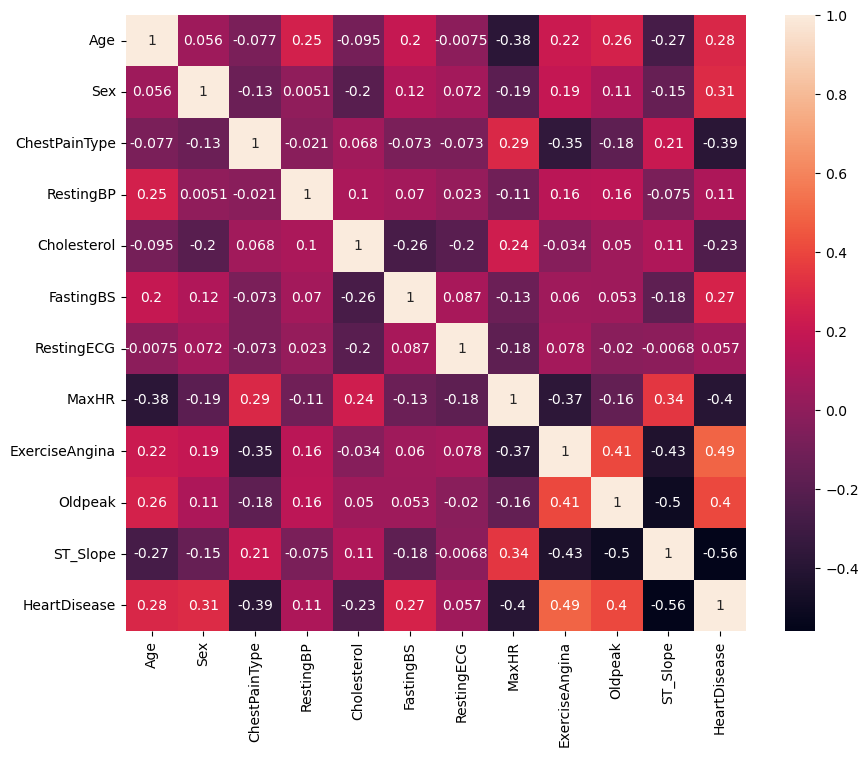

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()
plt.figure(figsize =(10,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 42)

In [116]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=  14, max_features ='log2', min_samples_leaf=4, 
min_samples_split= 15, n_estimators= 450)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {acc_rf:.4f}")


Random Forest Accuracy: 0.8877


In [103]:
from sklearn.tree import DecisionTreeClassifier, export_text

dt = DecisionTreeClassifier(min_samples_split = 2, random_state=42, max_depth = 8)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {acc_dt:.4f}")

Decision Tree Accuracy: 0.7826


In [104]:
feature_names_list = list(df.drop('HeartDisease', axis=1).columns)

In [105]:
tree_rules = export_text(dt, feature_names = feature_names_list)
print(tree_rules)

|--- ST_Slope <= 1.50
|   |--- ChestPainType <= 0.50
|   |   |--- MaxHR <= 175.50
|   |   |   |--- Sex <= 0.50
|   |   |   |   |--- Oldpeak <= 1.05
|   |   |   |   |   |--- RestingBP <= 140.00
|   |   |   |   |   |   |--- MaxHR <= 133.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- MaxHR >  133.50
|   |   |   |   |   |   |   |--- RestingBP <= 128.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- RestingBP >  128.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- RestingBP >  140.00
|   |   |   |   |   |   |--- Cholesterol <= 327.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Cholesterol >  327.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Oldpeak >  1.05
|   |   |   |   |   |--- Age <= 67.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Age >  67.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- Sex >  0.50
|   |   |   |   |--- MaxHR <

In [121]:
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {acc_xgb:.4f}")


XGBoost Accuracy: 0.8587
[CV] END max_depth=25, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=249; total time=   0.4s
[CV] END max_depth=21, max_features=sqrt, min_samples_leaf=10, min_samples_split=17, n_estimators=370; total time=   0.6s
[CV] END max_depth=25, max_features=log2, min_samples_leaf=15, min_samples_split=8, n_estimators=363; total time=   0.6s
[CV] END max_depth=14, max_features=log2, min_samples_leaf=18, min_samples_split=13, n_estimators=261; total time=   0.4s
[CV] END max_depth=29, max_features=log2, min_samples_leaf=8, min_samples_split=17, n_estimators=336; total time=   0.6s
[CV] END max_depth=13, max_features=log2, min_samples_leaf=7, min_samples_split=10, n_estimators=427; total time=   0.8s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=14, min_samples_split=4, n_estimators=356; total time=   0.7s
[CV] END max_depth=11, max_features=log2, min_samples_leaf=15, min_samples_split=12, n_estimators=171; total time=   0.3s
[CV] E

In [122]:
print("Base XGB CV Score:", cross_val_score(xgb, X_train, y_train, cv=5).mean())

Base XGB CV Score: 0.8535004844961239


In [123]:
confusion_matrix(y_test, y_pred_dt, labels=[0,1])

array([[ 92,  20],
       [ 40, 124]])

In [124]:
confusion_matrix(y_test, y_pred_xgb, labels=[0,1])

array([[ 97,  15],
       [ 24, 140]])

In [125]:
confusion_matrix(y_test, y_pred_rf, labels=[0,1])

array([[ 97,  15],
       [ 16, 148]])

In [110]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_feature_importance(model, model_name, features):
    importances = model.feature_importances_
    feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
    feature_df = feature_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.barh(feature_df['Feature'], feature_df['Importance'], color='skyblue')
    plt.xlabel('Importance Score')
    plt.title(f'Feature Importance - {model_name}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig(f"results/{model_name.lower().replace(' ', '_')}_feature_importance.png")
    plt.show()


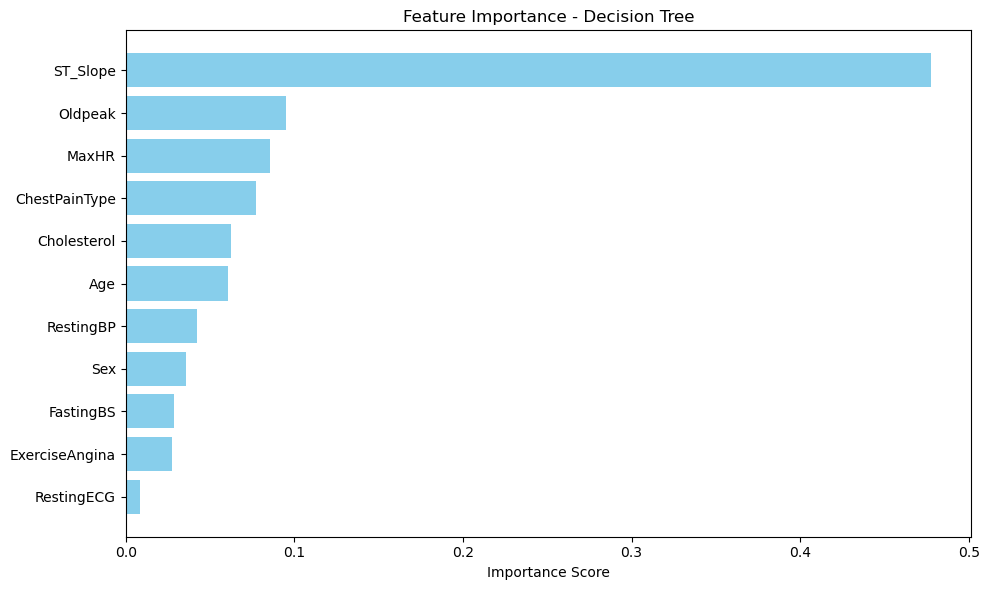

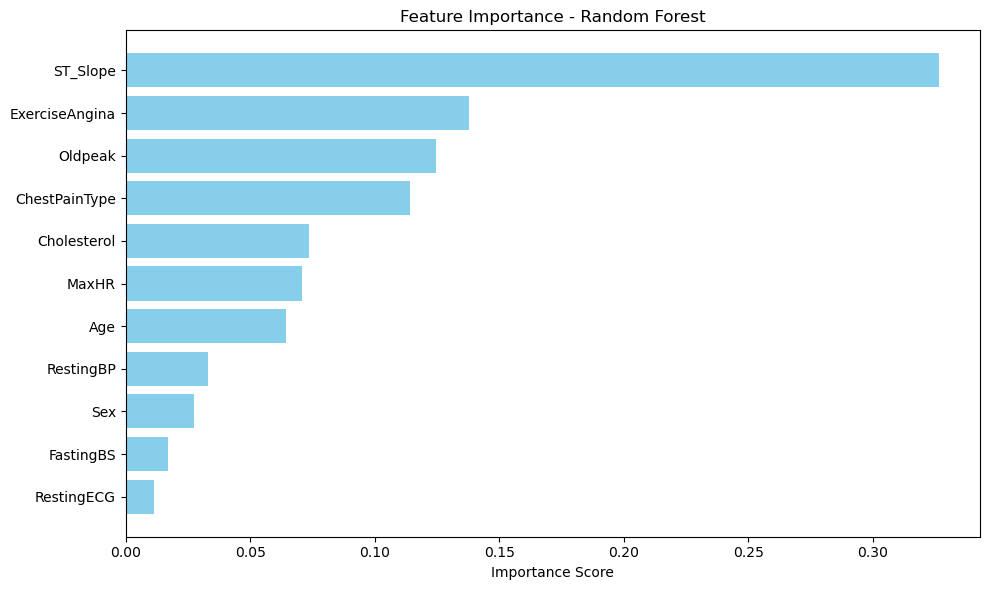

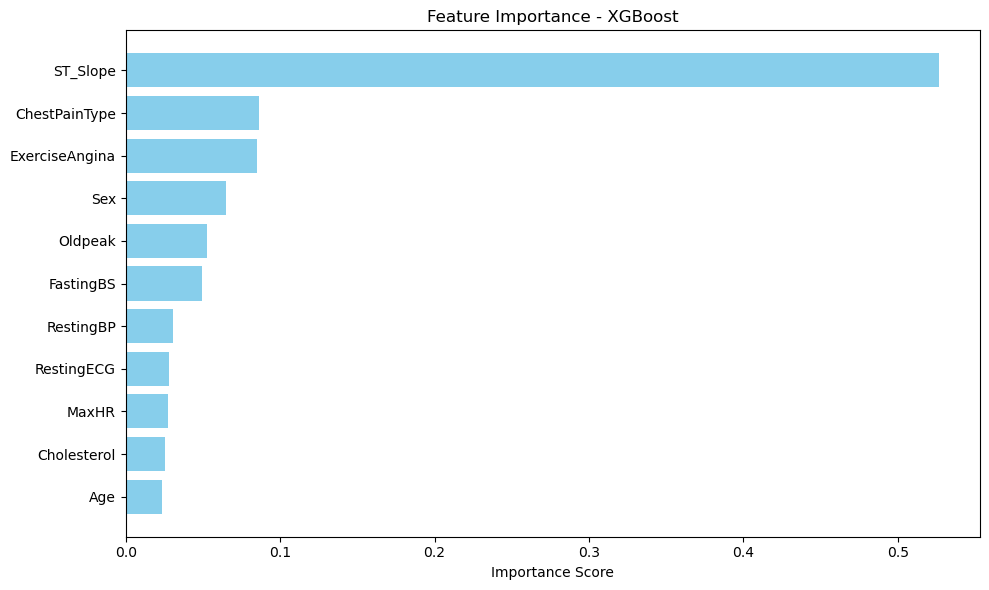

In [ ]:
plot_feature_importance(dt, "Decision Tree", features)
plot_feature_importance(rf, "Random Forest", features)
plot_feature_importance(xgb, "XGBoost", features)


In [113]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X, y, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", scores)
print("Average CV Score:", scores.mean())


Cross-validation scores: [0.88586957 0.85326087 0.82608696 0.83060109 0.73770492]
Average CV Score: 0.826704680446662


In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import numpy as np

# Your model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter space
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(5, 30),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2']
}

# Randomized Search
random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=20,              # Try 30 random combinations
    cv=5,                   # 5-fold cross-validation
    scoring='accuracy',
    verbose=2,
    random_state=42,
    n_jobs=-1               # Use all CPU cores
)

# Fit to your data
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)

# Evaluate
best_rf = random_search.best_estimator_
print("Best RF CV score:", np.mean(cross_val_score(best_rf, X_train, y_train, cv=5)))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'max_depth': 24, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 406}
Best RF CV score: 0.8581758720930232


In [127]:
df_new = df.drop(columns = [ 'RestingECG', 'FastingBS', 'ChestPainType', 'Sex', 'MaxHR'] )

In [128]:
X= df_new.iloc[:, :-1].values
y=df_new['HeartDisease']

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [132]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=  24, max_features ='log2', min_samples_leaf=3, 
min_samples_split= 6, n_estimators= 406)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {acc_rf:.4f}")


Random Forest Accuracy: 0.8478
